# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Цель исследования</b>

Изучить архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, определить рыночную стоимость объектов недвижимости, также установить параметры, от которых зависит эта цена. 

<b>План исследования:</b>
1. Изучить общую информацию.
2. Провести предобработку данных.
3. Добавить необходимые столбцы в таблицу.
4. Провести исследовательский анализ данных.

### Откроем файл с данными и изучим общую информацию. 

#### Импортируем необходимые библиотеки pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Выведем первые 20 строчек датафрейма на экран:

In [3]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Выведем основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего записей в датафрейме - 23699. 

#### Построим гистограмму для всех числовых столбцов таблицы на одном графике.

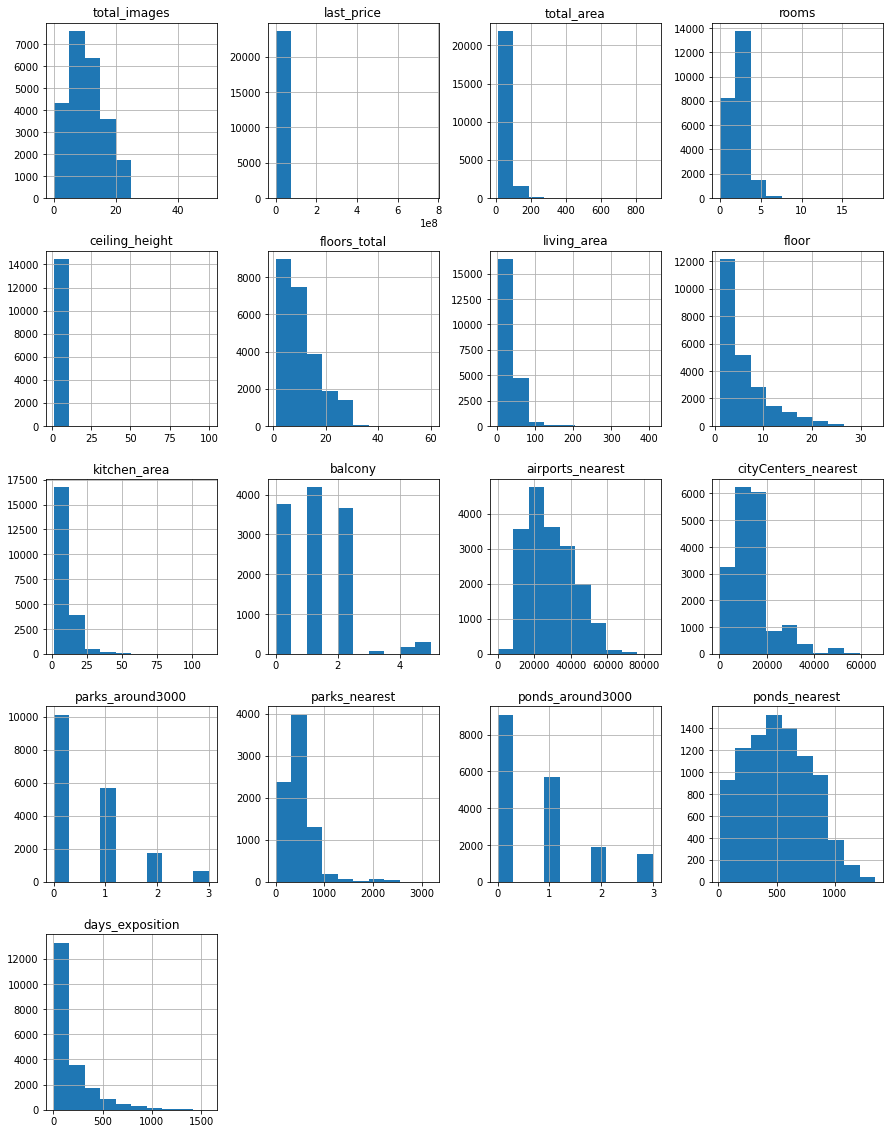

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Изучив общую информацию по датафрейму, мы видим пропущенные значения (NaN), а также неверные типы данных и странные значения, которые в дальнейшем не остануться без проверки.

### Предобработка данных

#### Найдём и изучим пропущенные значения в столбцах.

Выведем количество пропущенных значений для каждого столбца.

In [6]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Пропуски присутствуют во многих столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area , balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

Сильно выделяются столбцы с отличительно большим количеством пропусков: <b>balcony, ponds_nearest, parks_nearest, is_apartment</b>.

Меньше всего пропусков в столбцах: <b>locality_name, floors_total</b>.

- Рассмотрим столбец <b>balcony</b>, выявим причину пропусков. Для этого рассмотрим какие данные находятся в этом столбце: 

In [7]:
data['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Мы видим, что количество балконов приходится от ноля (балконов вообще нет) и до 5-ти. Про значения NaN можно сказать, 
что продавец мог просто не указать число балконов, так как в квартире их нет, поэтому все такие значения можно
заменить на 0.

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts(dropna=False)

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

- Рассмотрим столбцы <b>ponds_nearest</b> и <b>parks_nearest</b>:

In [9]:
data['ponds_nearest'].value_counts(dropna=False)

NaN       14589
427.0        70
454.0        41
153.0        40
433.0        39
          ...  
150.0         1
105.0         1
59.0          1
1187.0        1
1075.0        1
Name: ponds_nearest, Length: 1097, dtype: int64

In [10]:
data['parks_nearest'].value_counts(dropna=False)

NaN       15620
441.0        67
173.0        41
392.0        41
456.0        40
          ...  
1211.0        1
4.0           1
760.0         1
2747.0        1
755.0         1
Name: parks_nearest, Length: 996, dtype: int64

Мы видим большое количетсво пропусков в этих столбцах. Можно предположить, что их причиной могло стать то, что пользователь мог не знать расстояния до ближайшего парка или пруда, либо мог просто не заметить и пропустить данный параметр. В любом случае, нам сложно найти логическую замену для данных значений, поэтому оставим их пустыми.

- Рассмотрим столбец <b>is_apartment</b>:

In [11]:
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Мы видим, что есть пропуски NaN, многие квартиры не являются апартаментами, либо тот, кто публикует объявление, не указывает эти параметры. Заменим пропущенные значения на False:

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

- Рассмотрим столбцы  <b>locality_name</b> и <b>floors_total</b> - название населённого пункта и всего этажей в доме соответственно:

In [13]:
data['locality_name'].value_counts(dropna=False) 

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
посёлок Платформа 69-й километр        1
деревня Пельгора                       1
деревня Лупполово                      1
поселок Усть-Луга                      1
поселок Калитино                       1
Name: locality_name, Length: 365, dtype: int64

In [14]:
data['locality_name'].isna().sum()

49

In [15]:
data['floors_total'].value_counts(dropna=False)

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
33.0       1
29.0       1
60.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Пропуски в этих столбцах составляют малую часть от общего количества данных, поэтому мы можем их удалить:

In [16]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

- Рассмотрим столбцы  <b>parks_around3000</b> и <b>ponds_around3000</b> - число парков в радиусе 3 км и число прудов в радиусе 3 км соответственно:

In [17]:
data['parks_around3000'].value_counts(dropna=False)  

0.0    10039
1.0     5647
NaN     5500
2.0     1736
3.0      643
Name: parks_around3000, dtype: int64

In [18]:
data['ponds_around3000'].value_counts(dropna=False)  

0.0    9029
1.0    5662
NaN    5500
2.0    1883
3.0    1491
Name: ponds_around3000, dtype: int64

Мы не сможем найти логическую замену для пропущенных значений в этих столбцах, поэтому оставим их пустыми:

- Рассмотрим столбцы <b>ceiling_height</b>, <b>living_area</b>  и <b>kitchen_area</b>:

In [19]:
data['ceiling_height'].value_counts(dropna=False)  

NaN     9084
2.50    3515
2.60    1645
2.70    1571
3.00    1108
        ... 
4.06       1
3.68       1
1.75       1
5.00       1
4.65       1
Name: ceiling_height, Length: 184, dtype: int64

In [20]:
data['living_area'].value_counts(dropna=False)  

NaN      1865
18.00     882
17.00     673
30.00     598
16.00     483
         ... 
54.43       1
86.10       1
99.70       1
29.74       1
16.74       1
Name: living_area, Length: 1770, dtype: int64

In [21]:
data['kitchen_area'].value_counts(dropna=False)  

NaN      2222
6.00     1298
10.00    1259
8.00     1108
9.00     1099
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 964, dtype: int64

Пустые строки в столбце <b>ceiling_height</b> можно заменить медианным значением по всему датасету, для этого сгруппируем значение высот потолка - <b>locality_name</b> и по названию населённого пункта - <b>floors_total</b>, по количеству этажей в доме (такой метод можно применить, потому что в определенной местности и доме примерно одинаковое строение домов и квартир).

In [22]:
data['ceiling_height']

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23565, dtype: float64

In [23]:
# Группируем значения высот и ищем медианное значение для них:
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].\
            apply(lambda x: x.fillna(x.median()))

# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [24]:
data['ceiling_height']

0        2.70
1        2.65
2        2.60
3        2.60
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23565, dtype: float64

Пустые значения в столбцах <b>living_area</b> можно подобрать таким образом, что сначала мы найдём отношение жилой площади к общей площади всей квартиры, возьмём среднее значение по всем столбцам, далее заполним пропуски умножив наше найденное отношение на общую площадь, которая нам известна:

In [25]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

Тоже самое проделаем для замены пустых значений столбца <b>kitchen_area</b>:

In [26]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Посмотрим, какие пропуски у нас остались:

In [27]:
data.isna().sum().sort_values()

total_images                0
locality_name               0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
days_exposition          3171
parks_around3000         5500
ponds_around3000         5500
cityCenters_nearest      5501
airports_nearest         5524
ponds_nearest           14529
parks_nearest           15535
dtype: int64

#### Рассмотрим типы данных в каждом столбце:

Найдём столбцы, в которых нужно изменить тип данных. Для этого ещё раз посмотрим на общую информуцию о датафрейме.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

1) Сразу можно отметить столбец <b>first_day_exposition</b> - тип object, в идеале у даты должен быть формат datetime. 

2) Изменим также формат столбца <b>last_price</b>, так как цена обычно указывается в целочисленном виде. 

3) Столбец <b>balcony</b>, где указано количество балконов тоже должен содержать целые значения.

4) Столбец <b>floors_total</b>, где указана этажность объекта приводим к целлочисленому типу. 

In [29]:
# Приводим к типу datetime дату публикации:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Приводим в целочисленный тип стоимость квартиры:
data['last_price'] = data['last_price'].astype(int)

# Приводим в целочисленный тип количество балконов:
data['balcony'] = data['balcony'].astype(int)

# Приводим этажность к целочисленному типу:
data['floors_total'] = data['floors_total'].astype(int)

# Замена типа данных с float64 на float32 для экономии памяти:
data['total_area'] = data['total_area'].astype('float32')
data['ceiling_height'] = data['ceiling_height'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')
data['airports_nearest'] = data['airports_nearest'].astype('float32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32')
data['parks_around3000'] = data['parks_around3000'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].astype('float32')
data['ponds_around3000'] = data['ponds_around3000'].astype('float32')
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')
data['days_exposition'] = data['days_exposition'].astype('float32')

Мы преобразовали всевозможные типы данных в столбцах, проверим результат:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float32       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float32       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float32       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float32       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. 

Рассмотрим уникальные значения в столбце <b>locality_name</b> (названия населённого пункта):

In [31]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Посчитаем количество названий методом len().

In [32]:
len(data['locality_name'].sort_values().unique())

364

Заметим, что есть значения, которые повторяют друг друга, например, 'поселок Мурино' и 'посёлок Мурино'. Такие дубликаты нужно исправлять, для этого мы можем воспользоваться цепочкой методов replace() и убрать все типы населённых пунктов (посёлок, деревня и т.д.), оставив только названия:

In [33]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('поселок', 'посёлок').replace(['городской поселок', 'городской посёлок', 'деревня', \
    'коттеджный поселок', 'коттеджный посёлок', 'поселок городского типа', 'посёлок городского типа', 'село', \
    'посёлок при железнодорожной станции', 'посёлок городского типа имени', 'посёлок',\
    'садоводческое некоммерческое товарищество', 'садовое товарищество', 'станции'], \
    '', regex=True)
) 

Ещё раз посчитаем количество названий.

In [34]:
len(data['locality_name'].sort_values().unique())

312

Было 364 названий, а стало 312, следовательно мы исключили 52 повтора
. Посмотрим, как выглядит столбец после обработки дубликатов:

In [35]:
data['locality_name'].head(20)

0     Санкт-Петербург
1              Шушары
2     Санкт-Петербург
3     Санкт-Петербург
4     Санкт-Петербург
5             Янино-1
6           Парголово
7     Санкт-Петербург
8              Мурино
9     Санкт-Петербург
10    Санкт-Петербург
11          Ломоносов
12          Сертолово
13           Петергоф
14             Пушкин
15    Санкт-Петербург
16    Санкт-Петербург
17    Санкт-Петербург
18    Санкт-Петербург
19    Санкт-Петербург
Name: locality_name, dtype: object

Посмотрим на количество явных дубликатов:

In [36]:
data.duplicated().sum()

0

Явных дубликатов нет.

### Посчитайте и добавьте в таблицу новые столбцы

#### Рассчитаем цену одного квадратного метра.

Создадим новый столбец <b>price_per_meter</b>, в котором будет храниться значение от деления стоимости объекта на его общую площадь:

In [37]:
data['price_per_meter'] = round(data['last_price'] / data['total_area'])
data['price_per_meter'] = data['price_per_meter'].astype(int)
data['price_per_meter']

0        120370
1         82921
2         92786
3        408176
4        100000
          ...  
23694     72491
23695     52542
23696     44092
23697    149511
23698     41796
Name: price_per_meter, Length: 23565, dtype: int64

#### День недели публикации объявления.

Создадим новый столбец <b>weekday</b>, в котором будут указаны значения в зависимости от дня недели при публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [38]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23565, dtype: int64

#### Месяц публикации объявления.

Создадим новый столбец <b>month</b>, в котором будут указаны значения в зависимости от месяца при публикации объявления (1 — январь, 2 — февраль и так далее).

In [39]:
data['month'] = data['first_day_exposition'].dt.month
data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23565, dtype: int64

#### Год публикации объявления.

Создадим новый столбец <b>year</b>, в котором будут указаны значения в зависимости от года при публикации объявления.

In [40]:
data['year'] = data['first_day_exposition'].dt.year
data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23565, dtype: int64

#### Тип этажа квартиры.

Создадим новый столбец <b>type_floor</b>, в котором будут указаны значения в зависимости от нумерации этажей, на котором находится квартира (если квартира находится на 1 этаже, то значение «первый», если на таком этаже, сколько всего их в доме, значение - «последний», иначе - этаж «другой»). 

In [41]:
def typing(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(typing, axis=1)
data['type_floor'].head(20)

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
15       другой
16       первый
17       другой
18       другой
19       другой
Name: type_floor, dtype: object

#### Расстояние до центра города в километрах.

Создадим новый столбец <b>distance_to_city_center</b>, в котором будут указаны значения расстояния до центра в города в километрах. Для этого нам нужно столбец <b>cityCenters_nearest</b> разделить на 1000 и округлить результат до ближайших целых значений.

In [42]:
data['distance_to_city_center'] = round(data['cityCenters_nearest'] / 1000)
data['distance_to_city_center']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: distance_to_city_center, Length: 23565, dtype: float32

###  Исследовательский анализ данных

#### Изучим некоторые параметры объеков. 

1) Проанализируем данные в столбце <b>total_area</b>, где указана общая площадь квартиры в м². Для этого создадим гистограмму:

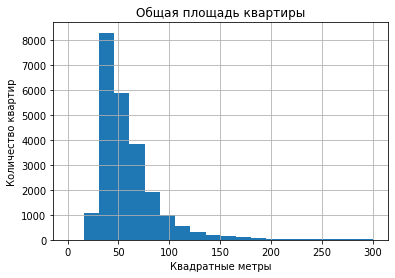

In [43]:
plt.title('Общая площадь квартиры')
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')

data['total_area'].hist(bins=20, range=(1, 300))

plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир с общей площадью от 30 и до 50 м². 

<div>Также можно проанализировать данные при помощи метода <b>describe()</b>:

In [44]:
data['total_area'].describe()

count    23565.000000
mean        60.322826
std         35.657059
min         12.000000
25%         40.000000
50%         52.000000
75%         69.699997
max        900.000000
Name: total_area, dtype: float64

In [45]:
data.loc[data['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor,distance_to_city_center
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.700012,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,466667,2,12,2017,последний,8.0


Видим, что максимальное значение - 900 м², это очень большая площадь для квартиры, но остальные данные соответствуют для данной площади (это может быть коттедж за городом). Чтобы лучше изучить данные и визуально посмотреть на распределение значений, а также то, какие есть редкие и аномальные значения, построим диаграмму размаха. 

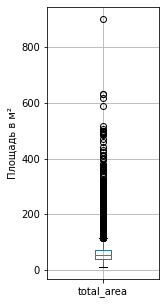

In [46]:
data.boxplot(column=['total_area'], figsize=(2,5), grid=True)
plt.ylabel('Площадь в м²')
plt.show()

Видно, что много значений вышло за верхний "ус" диаграммы, то есть за область нормальных значений, следовательно,  необходимо сделать срез данных, чтобы ненужные значения (выбросы) не мешали анализу:

In [47]:
#Создадим копию нашего исходного датафрейма и запишем в data_new:
data_new = data

In [48]:
data_new = data_new.query('total_area >= 10 & total_area <= 400').reset_index(drop=True)

Образ диаграммы размаха после того, как срезали лишние значения:

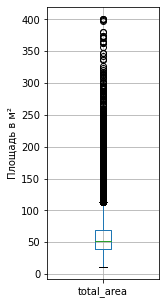

In [49]:
data_new.boxplot(column=['total_area'], figsize=(2,5), grid=True)
plt.ylabel('Площадь в м²')
plt.show()

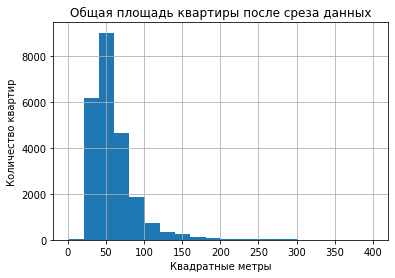

In [50]:
plt.title('Общая площадь квартиры после среза данных')
data_new['total_area'].hist(bins=20, range=(1, 400))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
plt.show()

2) Проанализируем данные в столбце <b>living_area</b>, где указана жилая площадь в м². Для этого создадим гистограмму:

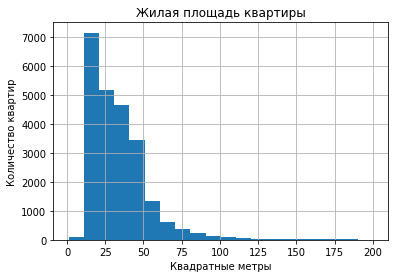

In [51]:
plt.title('Жилая площадь квартиры')
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')

data_new['living_area'].hist(bins=20, range=(1, 200))

plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир с жилой площадью от 15 и до 20 м². 
<div>Также можно проанализировать данные при помощи метода <b>describe()</b>:

In [52]:
data_new['living_area'].describe()

count    23542.000000
mean        34.352757
std         20.914812
min          2.000000
25%         19.000000
50%         30.000000
75%         42.099998
max        264.500000
Name: living_area, dtype: float64

Построим диаграмму размаха для значений жилой площади:

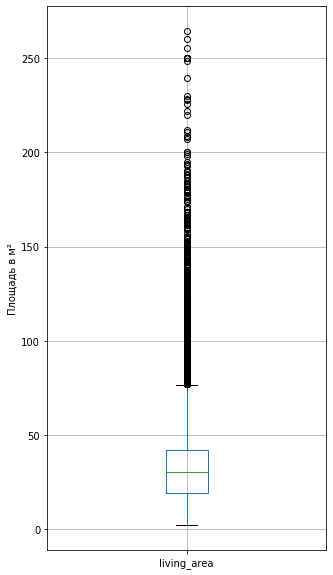

In [53]:
data_new.boxplot(column=['living_area'], figsize=(5,10), grid=True)
plt.ylabel('Площадь в м²')
plt.show()

По результат гистограммы и диаграммы размаха можно сказать, что значения, которые находятся после 80 м² выбиваются из общего распределения (выходят за границы "усов"). Так как большое количество квартир приходится с жилой площадью больше 80 м² их нельзя отбросить все, так как потеряем большое количество информации. Сделаем срез данных для квартир с жилой площадью больше 5 м², но меньше 240 м²:

In [54]:
data_new = data_new.query('living_area >= 5 & living_area <= 240').reset_index(drop=True)

Диаграмма размаха площади после отсечения выбивающихся значений:

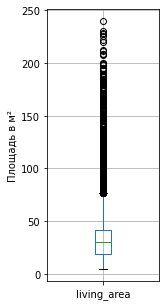

In [55]:
data_new.boxplot(column=['living_area'], figsize=(2,5), grid=True)
plt.ylabel('Площадь в м²')
plt.show()

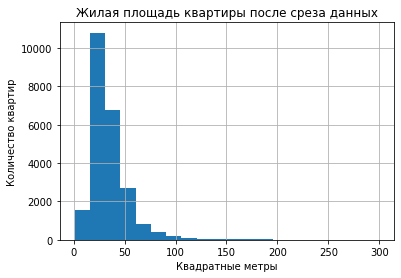

In [56]:
plt.title('Жилая площадь квартиры после среза данных')
data_new['living_area'].hist(bins=20, range=(1, 300))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
plt.show()

3) Проанализируем данные в столбце <b>kitchen_area</b>, где указана площадь кухни в м². Для этого создадим гистограмму:

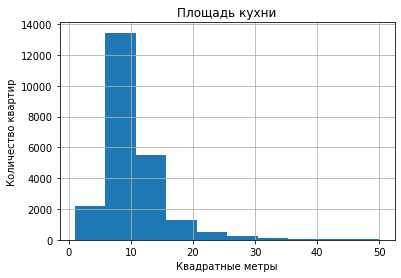

In [57]:
plt.title('Площадь кухни')
data_new['kitchen_area'].hist(bins=10, range=(1, 50))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир с площадью кухни от 5 и до 12 м².
<div>Также можно проанализировать данные при помощи метода <b>describe()</b>:

In [58]:
data_new['kitchen_area'].describe()

count    23529.000000
mean        10.449221
std          5.811441
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Построим диаграмму размаха для значений площади кухни:

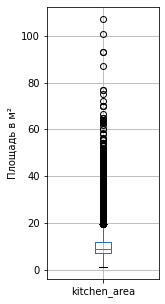

In [59]:
data_new.boxplot(column=['kitchen_area'], figsize=(2,5), grid=True)
plt.ylabel('Площадь в м²')
plt.show()

Видно, что много значений вышло за область нормальных значений, следовательно, неоходимо сделать срез данных, чтобы ненужные значения (выбросы) не мешали анализу. Большое количество квартир с огромными кухнями могли появится от того, что есть совмещенные гостинные и кухни, поэтому пользователь мог записать общую площадь.

In [60]:
data_new = data_new.query('kitchen_area >= 5 & kitchen_area <= 80').reset_index(drop=True)

Образ диаграммы размаха после того, как срезали лишние значения:

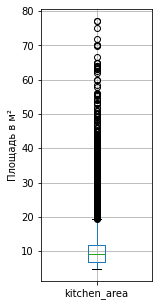

In [61]:
data_new.boxplot(column=['kitchen_area'], figsize=(2,5), grid=True)
plt.ylabel('Площадь в м²')
plt.show()

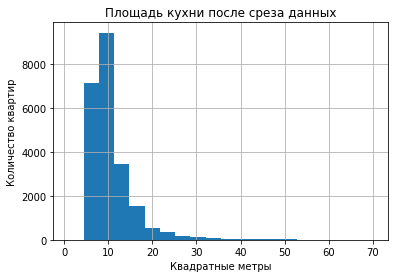

In [62]:
plt.title('Площадь кухни после среза данных')
data_new['kitchen_area'].hist(bins=20, range=(1, 70))
plt.ylabel('Количество квартир')
plt.xlabel('Квадратные метры')
plt.show()

4) Проанализируем данные в столбце <b>last_price</b>, где указана цена объекта на момент снятия с публикации. Для этого создадим гистограмму:

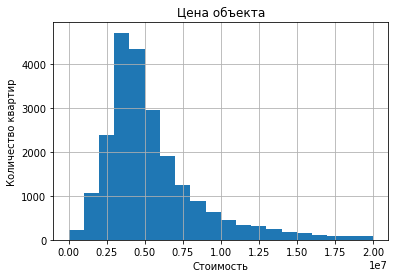

In [63]:
plt.title('Цена объекта')
data_new['last_price'].hist(bins=20, range=(0, 20_000_000))
plt.ylabel('Количество квартир')
plt.xlabel('Стоимость')
plt.show()

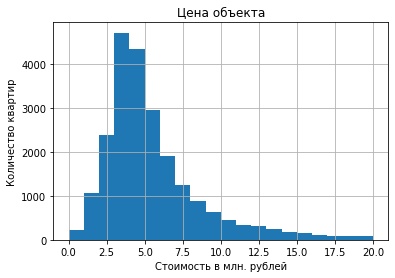

In [64]:
data_new['last_price_new'] = data_new['last_price'] / 1_000_000
plt.title('Цена объекта')
data_new['last_price_new'].hist(bins=20, range=(0, 20))
plt.ylabel('Количество квартир')
plt.xlabel('Стоимость в млн. рублей')
plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир стоимостью от 3 до 5 млн. рублей.
<div>Также можно проанализировать данные при помощи метода <b>describe()</b>:

In [65]:
data_new['last_price'].describe() 

count    2.309500e+04
mean     6.414576e+06
std      8.071251e+06
min      1.219000e+04
25%      3.492652e+06
50%      4.690000e+06
75%      6.800000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Построим диаграмму размаха для стоимости квартир:

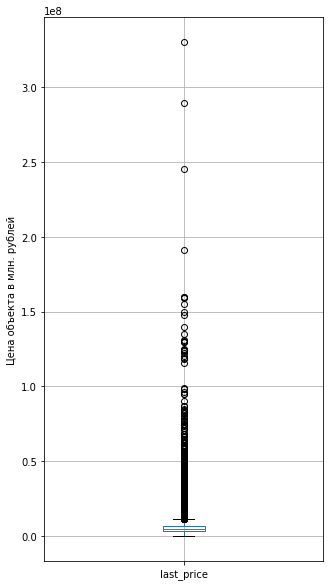

In [66]:
data_new.boxplot(column=['last_price'], figsize=(5,10), grid=True)
plt.ylabel('Цена объекта в млн. рублей')
plt.show()

По результатам гистограммы и диаграммы размаха можно сказать, что значения, которые находятся после 100 млн. рублей выбиваются из общего распределения.

In [67]:
data_new = data_new.query('last_price <= 100_000_000').reset_index(drop=True)

Диаграмма размаха площади после отсечения выбивающихся значений:


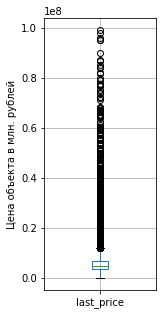

In [68]:
data_new.boxplot(column=['last_price'], figsize=(2,5), grid=True)
plt.ylabel('Цена объекта в млн. рублей')
plt.show()

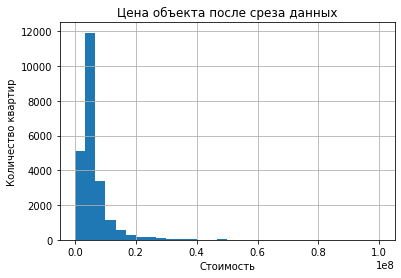

In [69]:
plt.title('Цена объекта после среза данных')
data_new['last_price'].hist(bins=30, range=(1, 100_000_000))
plt.ylabel('Количество квартир')
plt.xlabel('Стоимость')
plt.show()

5) Проанализируем данные в столбце <b>rooms</b>, где указано количество комнат. Для этого создадим гистограмму:

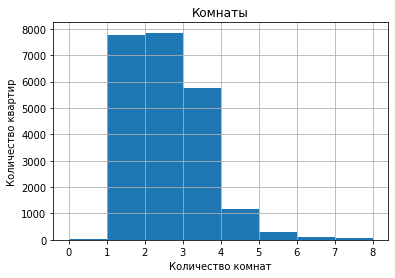

In [70]:
plt.title('Комнаты')
data_new['rooms'].hist(bins=8, range=(0, 8))
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир с числом комнат от 1 до 3.

Также можно проанализировать данные при помощи метода describe():

In [71]:
data_new['rooms'].describe()

count    23070.000000
mean         2.084699
std          1.046670
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Чтобы лучше изучить данные и визуально посмотреть на распределение значений, построим диаграмму размаха.

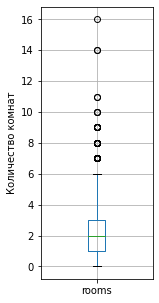

In [72]:
data_new.boxplot(column=['rooms'], figsize=(2,5), grid=True)
plt.ylabel('Количество комнат')
plt.show()

По результатам гистограммы и диаграммы размаха можно сказать, что значения, которые находятся после 10, выбиваются из общего распределения.

In [73]:
data_new = data_new.query('rooms <= 10').reset_index(drop=True)

Диаграмма размаха количества комнат после отсечения выбивающихся значений:

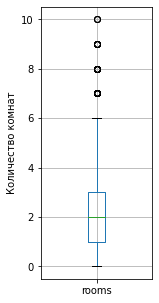

In [74]:
data_new.boxplot(column=['rooms'], figsize=(2,5), grid=True)
plt.ylabel('Количество комнат')
plt.show()

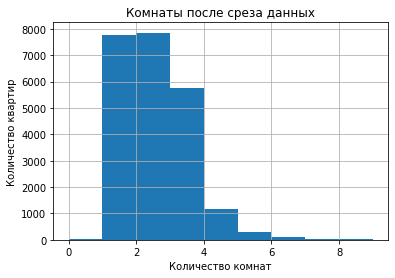

In [75]:
plt.title('Комнаты после среза данных')
data_new['rooms'].hist(bins=9, range=(0, 9))
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()

6) Проанализируем данные в столбце <b>ceiling_height</b>, где указана высота потолков в метрах. Для этого создадим гистограмму: 

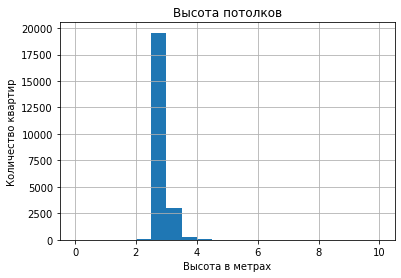

In [76]:
plt.title('Высота потолков')
data_new['ceiling_height'].hist(bins=20, range=(0, 10))
plt.ylabel('Количество квартир')
plt.xlabel('Высота в метрах')
plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир с высотой потолков от 2 и до 4 метров.
Также можно проанализировать данные при помощи метода describe():

In [77]:
data_new['ceiling_height'].describe()

count    23065.000000
mean         2.735691
std          1.006016
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Чтобы лучше изучить данные и визуально посмотреть на распределение значений, построим диаграмму размаха.

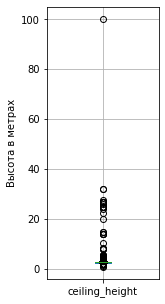

In [78]:
data_new.boxplot(column=['ceiling_height'], figsize=(2,5), grid=True)
plt.ylabel('Высота в метрах')
plt.show()

Мы видим огромные значения для высоты потолков, скорее всего это ошибка произошла при записи вещественных значений. Необходимо избавиться от этих аномалий, для этого значение необходимо разделить на 10, так как высота 40 метров не может быть, а вот 4 метра вполне существует:

In [79]:
# Создадим функцию, которая будет уменьшать аномальные значения в 10 раз
def height(old_height):
    if 20 <= old_height <= 100:
        return old_height / 10
    return old_height
# Заменим только аномальные значения в столбце 'ceiling_height'
data_new['ceiling_height'] = data_new['ceiling_height'].apply(height).reset_index(drop=True)

Образ диаграммы размаха после того, как избавились от аномальных значений:

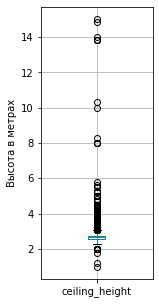

In [80]:
data_new.boxplot(column=['ceiling_height'], figsize=(2,5), grid=True)
plt.ylabel('Высота в метрах')
plt.show()

Теперь можно поработать со значениями, которые выбиваются из общего распределения. Такие значения находятся после 8 метров, их мы отбросим.

In [81]:
data_new = data_new.query('ceiling_height >= 2 & ceiling_height < 8').reset_index(drop=True)

Образ диаграммы размаха после того, как срезали данные:

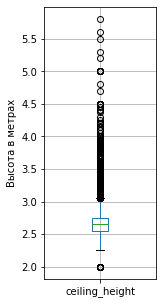

In [82]:
data_new.boxplot(column=['ceiling_height'], figsize=(2,5), grid=True)
plt.ylabel('Высота в метрах')
plt.show()

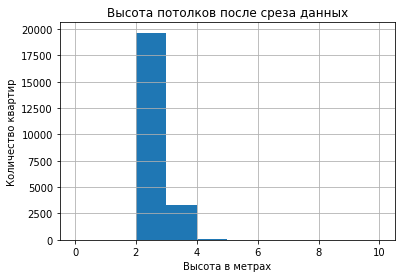

In [83]:
plt.title('Высота потолков после среза данных')
data_new['ceiling_height'].hist(bins=10, range=(0, 10))
plt.ylabel('Количество квартир')
plt.xlabel('Высота в метрах')
plt.show()

7) Проанализируем данные в столбце <b>type_floor</b>, где указан тип этажа квартиры («первый», «последний», «другой»). Для этого создадим гистограмму:

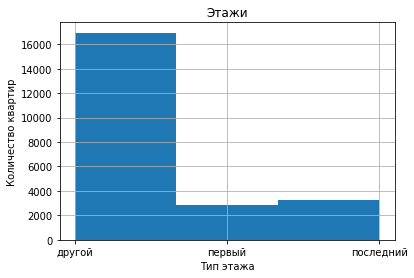

In [84]:
plt.title('Этажи')
data_new['type_floor'].hist(bins=3)
plt.ylabel('Количество квартир')
plt.xlabel('Тип этажа')
plt.show()

Больше всего продают квартиры, которые расположены ни на первых, ни на последних этажах дома.

8) Проанализируем данные в столбце <b>floors_total</b>, где указано сколько всего этажей в доме. Для этого создадим гистограмму:

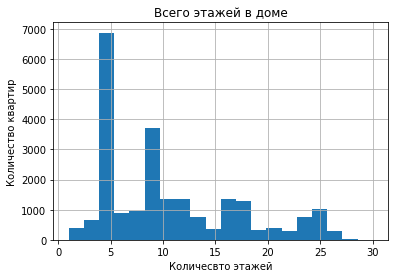

In [85]:
plt.title('Всего этажей в доме')
data_new['floors_total'].hist(bins=20, range=(1, 30))
plt.ylabel('Количество квартир')
plt.xlabel('Количесвто этажей')
plt.show()

По полученной гистограмме мы видим, что в основном продаются квартиры в пятиэтажных и девятиэтажных домах.

Также можно проанализировать данные при помощи метода describe():

In [86]:
data_new['floors_total'].describe()

count    23050.000000
mean        10.613536
std          6.544194
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

Чтобы лучше изучить данные и визуально посмотреть на распределение значений, построим диаграмму размаха.

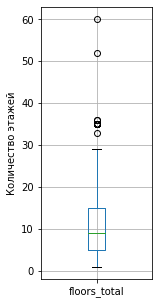

In [87]:
data_new.boxplot(column=['floors_total'], figsize=(2,5), grid=True)
plt.ylabel('Количество этaжей')
plt.show()

9) Проанализируем данные в столбце <b>cityCenters_nearest</b>, где указано расстояние до центра города метрах. Для этого создадим гистограмму:

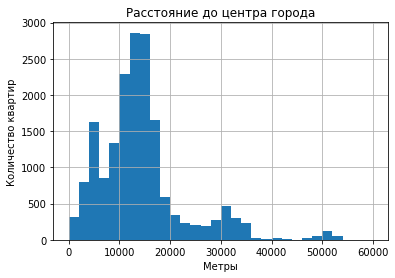

In [88]:
plt.title('Расстояние до центра города')
data_new['cityCenters_nearest'].hist(bins=30, range=(1, 60000))
plt.ylabel('Количество квартир')
plt.xlabel('Метры')
plt.show()

По полученной гистограмме мы видим, что размещено большое количество квартир удалённых от центра на расстояние 12-16 км.

Также можно проанализировать данные при помощи метода describe():

In [89]:
data_new['cityCenters_nearest'].describe()

count    17748.000000
mean     14220.508789
std       8603.733398
min        181.000000
25%       9289.000000
50%      13114.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Чтобы лучше изучить данные и визуально посмотреть на распределение значений, построим диаграмму размаха.

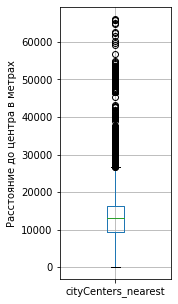

In [90]:
data_new.boxplot(column=['cityCenters_nearest'], figsize=(2,5), grid=True)
plt.ylabel('Расстояние до центра в метрах')
plt.show()

Посмотрим на данные после среза аномальных значений:

In [91]:
pd.set_option('display.max_columns', None)
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor,distance_to_city_center,last_price_new
0,20,13000000,108.000000,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0,13.000
1,7,3350000,40.400002,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921,1,12,2018,первый,19.0,3.350
2,10,5196000,56.000000,2015-08-20,2,2.60,5,34.299999,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786,3,8,2015,другой,14.0,5.196
3,0,64900000,159.000000,2015-07-24,3,2.60,14,90.816650,9,False,False,False,27.836861,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0,64.900
4,2,10000000,100.000000,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23045,9,9700000,133.809998,2017-03-21,3,3.70,5,73.300003,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491,1,3,2017,другой,4.0,9.700
23046,14,3100000,59.000000,2018-01-15,3,2.50,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542,0,1,2018,другой,NaN,3.100
23047,18,2500000,56.700001,2018-02-11,2,2.65,3,29.700001,1,False,False,False,9.926730,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44092,6,2,2018,первый,NaN,2.500
23048,13,11475000,76.750000,2017-03-28,2,3.00,17,43.837597,12,False,False,False,23.299999,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другой,10.0,11.475


Сделаем заключение по тому, какие объекты недвижимости чаще всего продают: это квартиры с общей площадью от 30 и до 50 м², с жилой площадью от 15 и до 20 м², с площадью кухни от 5 и до 12 м², стоимостью от 3 до 5 млн. рублей, с числом комнат от 1 до 3, с высотой потолков от 2 и до 4 метров, расположеные на любом этаже дома кроме первого и последнего, в пятиэтажных и девятиэтажных домах, удалённых от центра на расстояние 12-16 км.

In [92]:
data_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,distance_to_city_center,last_price_new
count,23050.000000,2.305000e+04,23050.000000,23050.000000,23050.000000,23050.000000,23050.000000,23050.000000,23050.000000,23050.000000,17727.000000,17748.000000,17749.000000,7915.000000,17749.000000,8838.000000,19927.000000,23050.000000,23050.000000,23050.000000,23050.000000,17748.000000,23050.000000
mean,9.912885,6.250075e+06,60.108307,2.082473,2.706008,10.613536,34.418819,5.840954,10.516101,0.593926,28846.728516,14220.508789,0.612034,490.622986,0.765508,519.415161,181.476837,98315.647505,2.567983,6.400434,2017.370933,14.214560,6.250075
std,5.678881,6.171354e+06,31.278383,1.033648,0.236375,6.544194,20.072065,4.833318,5.565149,0.961788,12635.776367,8603.733398,0.800414,342.002106,0.937296,277.256897,220.048386,42770.336514,1.789184,3.494950,1.038638,8.611998,6.171354
min,0.000000,1.219000e+04,20.000000,0.000000,2.000000,1.000000,5.400000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,112.000000,0.000000,1.000000,2014.000000,0.000000,0.012190
25%,6.000000,3.490000e+06,40.599998,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18561.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000,76355.750000,1.000000,3.000000,2017.000000,9.000000,3.490000
50%,10.000000,4.690000e+06,52.299999,2.000000,2.650000,9.000000,30.100000,4.000000,9.100000,0.000000,26812.000000,13114.000000,0.000000,455.000000,0.000000,503.000000,96.000000,94787.000000,3.000000,6.000000,2017.000000,13.000000,4.690000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.750000,15.000000,42.299999,8.000000,12.000000,1.000000,37364.000000,16293.000000,1.000000,612.000000,1.000000,732.000000,232.000000,113871.750000,4.000000,10.000000,2018.000000,16.000000,6.800000
max,50.000000,9.900000e+07,400.000000,10.000000,5.800000,60.000000,239.399994,33.000000,77.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,848485.000000,6.000000,12.000000,2019.000000,66.000000,99.000000


#### Изучим, как быстро продавались квартиры.

Для столбца <b>days_exposition</b> построим гистограмму, чтобы посмотреть время размещения объявления.

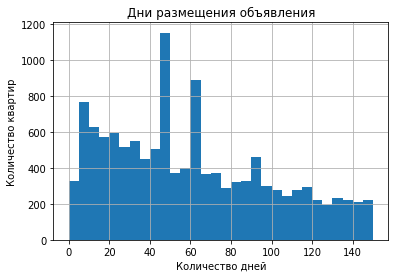

In [93]:
data_new['days_exposition'].hist(bins=30, range=(0, 150))
plt.title('Дни размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [94]:
data_new['days_exposition'].value_counts().head()

45.0    846
60.0    532
7.0     227
30.0    204
90.0    199
Name: days_exposition, dtype: int64

На гисторграмме видно, что  большое количество квартир продавалось спустя 45 и 60 дней с момента размещения объявления.

Посчитаем среднее значение и медиану для значений столбца <b>days_exposition</b>:

In [95]:
data_new['days_exposition'].describe()

count    19927.000000
mean       181.476837
std        220.048386
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет 181 день, а медианное - 96 дней. Есть пики продаж, которые можно назвать быстрыми, это те продажи, которые были совершены в 45 и 60 день после публикации объявления. Скорее всего это автоматическое снятие объявления, поэтому такое большое количество значений. Также есть продажи, которые можно назвать необычно долгими - 1580 дней (больше, чем 4 года).

Также для оценки скорости продажи недвижимости можно посмотреть зависимость от месяца публикации объявления:

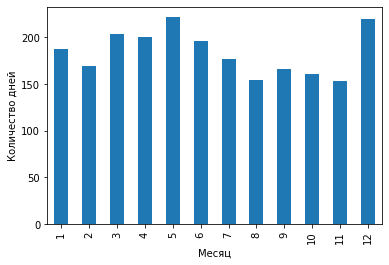

In [96]:
data_new.groupby('month')['days_exposition'].mean().plot.bar()
plt.xlabel('Месяц')
plt.ylabel('Количество дней')
plt.show()

Мы видим, что быстрее всего квартиры продавались в августе и ноябре, а дольше всего объявления находились на сайте в январе.

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

- Рассмотрим, зависит ли цена от общей площади:

Для этого мы можем построить диаграмму рассеяния при помощи метода <b>plot()</b>. Также, чтобы определить есть зависимость у этих двух параметров, необходимо найти коэффициент корреляции, поэтому построим матрицу корреляции. Для этого создадим сводную таблицу для столбцов <b>total_area</b> и <b>last_price</b>, которые будут объединены номером этажа, далее к этой таблице применяем метод <b>corr()</b>, который создаст матрицу корреляции.

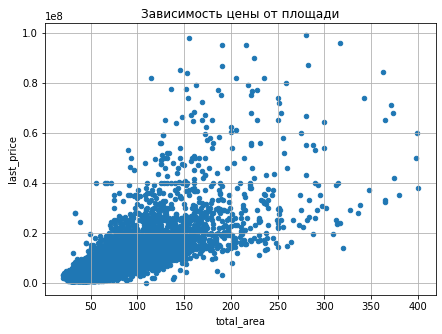

In [97]:
data_new.plot(x ='total_area', y = 'last_price', grid=True, kind='scatter', figsize=(7, 5), \
          title='Зависимость цены от площади')
plt.show()

In [98]:
print('Корреляция цены и общей площади:','\n')
print(data_new.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

Корреляция цены и общей площади: 

            last_price  total_area
last_price    1.000000    0.870742
total_area    0.870742    1.000000


Корелляция в 0,87 говорит о наличии хорошей связи между ценой и общей площадью: чем больше площадь объекта, тем больше становится цена. Однако есть квартиры с одинаковой площадью, но с разными ценами.

- Рассмотрим, зависит ли цена от жилой площади.

Построим диаграмму рассеяния и укажем корреляцию этих двух параметров:

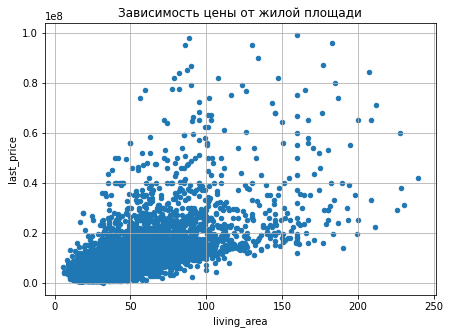

In [99]:
data_new.plot(x ='living_area', y = 'last_price', grid=True, kind='scatter', figsize=(7, 5), \
         title='Зависимость цены от жилой площади')
plt.show()

In [100]:
print('Корреляция цены и жилой площади:','\n')
print(data_new.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.747577
living_area    0.747577     1.000000


Корреляция между жилой площадью и ценой ниже, чем коэффициент для общей площади. Но всё равно на диаграмме видно зависимость, что при росте жилой площади растёт и цена.

- Рассмотрим, зависит ли цена от площади кухни.

Построим диаграмму рассеяния и рассмотрим корреляцию этих двух параметров:

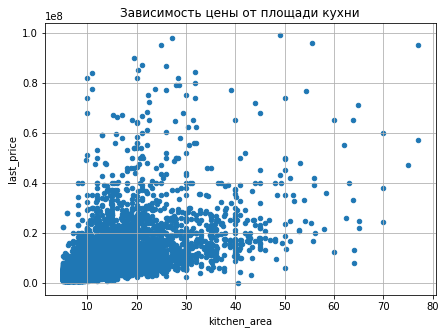

In [101]:
data_new.plot(x ='kitchen_area', y = 'last_price', grid=True, kind='scatter', figsize=(7, 5), \
         title='Зависимость цены от площади кухни')
plt.show()

In [102]:
print('Корреляция цены и площади кухни:','\n')
print(data_new.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.419943
last_price        0.419943    1.000000


Глядя на диаграмму видно, что увеличивается разброс цен на объекты с одинаковой площадью кухни, коррелиция ниже, чем у зависимости общей площади и жилой площади, поэтому зависимость практически не прослеживается. 

- Рассмотрим, зависит ли цена от количества комнат.

Построим диаграмму и учтём корреляцию для этих двух параметров:

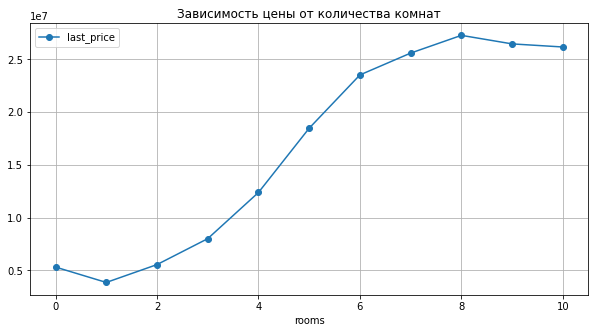

In [103]:
data_new.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5), \
                                                         title='Зависимость цены от количества комнат')
plt.show()

In [104]:
print('Корреляция цены и количества комнат:','\n')
print(data_new.pivot_table(index='floor', values=['rooms', 'last_price']).corr())

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.597719
rooms         0.597719  1.000000


По диаграмме сначала вы видим, что происходит рост цен, чем больше комнат в квартире, тем больше стоимость (особенно это видно у квартир с 1 до 6 комнат). Коэффициент корреляции - 0,59, это говорит о средней связи между количествои комнат и стоимостью квартиры.

- Рассмотрим, зависит ли цена от этажа, на котором расположена квартира.

Чтобы пронаблюдать зависимость построим столбчатый график:

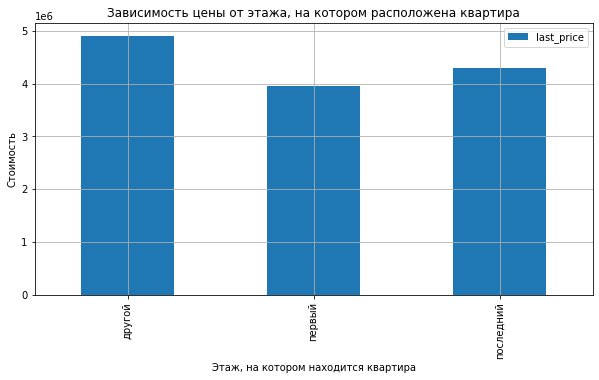

In [105]:
data_new.pivot_table(index='type_floor', values='last_price', aggfunc='median').plot(grid=True, kind='bar', \
            title='Зависимость цены от этажа, на котором расположена квартира', figsize=(10, 5))
plt.xlabel('Этаж, на котором находится квартира')
plt.ylabel('Стоимость')
plt.show()

Из этого графика видно, что дешевле квартиры продают, которые расположены на первом этаже. Дороже квартиры, которые расположены на последнем этаже. Самые дороги квартиры находятся на любом этаже кроме тех, которые были ранее перечислены.

- Рассмотрим, зависит ли цена от даты размещения (день недели, месяц, год).

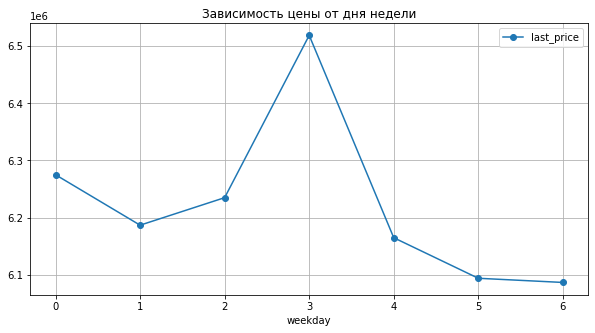

In [106]:
# Зависимость от дня размещения
data_new.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(10, 5), \
                     title='Зависимость цены от дня недели')
plt.show()

Дороже всего квартиры, опубликованные в четверг, а дешевле всего были в субботу и воскресенье.

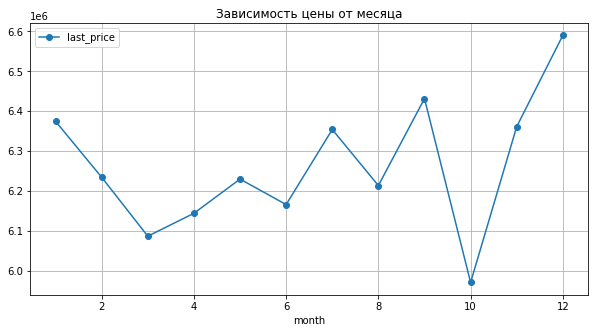

In [107]:
# Зависимость от месяца размещения
data_new.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(10, 5), \
                                                         title='Зависимость цены от месяца')
plt.show()

Из диаграммы видно, что в октябре квартиры продавались дешевле всего, а дороже всего, опубликованные в сентябре и декабре.

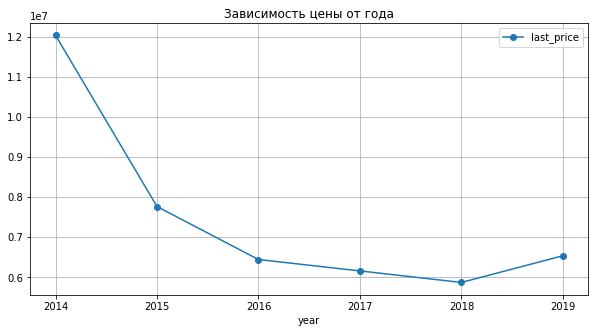

In [108]:
# Зависимость от года размещения

data_new.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(10, 5), \
                                            title='Зависимость цены от года')
plt.show()

Мы видим, что с 2014 года цены на квартиры снижались, а в 2018 году была самая низкая цена продаж. В 2019 году произошеёл небольшой рост цен. 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.

Вычислим 10 населённых пунктов с наибольшим числом объявлений:

In [109]:
city_10 = data_new['locality_name'].value_counts().head(10)
city_10

Санкт-Петербург    15364
 Мурино              491
 Шушары              430
Всеволожск           391
Пушкин               366
Колпино              337
 Парголово           324
Гатчина              302
 Кудрово             270
Выборг               232
Name: locality_name, dtype: int64

Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населённых пунктов:

In [110]:
median_price_per_meter = data_new.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','median'])
median_price_per_meter.columns = ['Количество объявлений', 'Средняя цена за квадратный метр']
median_price_per_meter = median_price_per_meter.sort_values(by='Количество объявлений', ascending=False).head(10)
display(median_price_per_meter.style.format("{:.3f}").background_gradient(cmap='Greens', axis=0))

,Количество объявлений,Средняя цена за квадратный метр
locality_name,,
Санкт-Петербург,15364.000,104437.500
Мурино,491.000,83019.000
Шушары,430.000,76573.500
Всеволожск,391.000,65789.000
Пушкин,366.000,100000.000
Колпино,337.000,74722.000
Парголово,324.000,91780.500
Гатчина,302.000,67926.000
Кудрово,270.000,91165.500


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [111]:
#Самая низкая стоимость за квадратный метр
median_price_per_meter[median_price_per_meter['Средняя цена за квадратный метр'] == \
              median_price_per_meter['Средняя цена за квадратный метр'].min()]

,Количество объявлений,Средняя цена за квадратный метр
locality_name,,
Выборг,232,58133.0


In [112]:
#Самая высокая стоимость за квадратный метр
median_price_per_meter[median_price_per_meter['Средняя цена за квадратный метр'] == \
              median_price_per_meter['Средняя цена за квадратный метр'].max()]

,Количество объявлений,Средняя цена за квадратный метр
locality_name,,
Санкт-Петербург,15364,104437.5


#### Ранее мы создали отдельный столбец distance_to_city_center - расстояние до центра в километрах. Выделим теперь квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

In [113]:
price_per_km = data_new.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='distance_to_city_center', values='price_per_meter')
display(price_per_km.style.format("{:.3f}").background_gradient(cmap='Greens', axis=0))

,price_per_meter
distance_to_city_center,
0.0,228257.440
1.0,153819.725
2.0,148542.589
3.0,121161.387
4.0,127871.398
5.0,137211.300
6.0,144073.799
7.0,153706.854
8.0,124239.087


Чтобы лучше увидеть, как стоимость объектов зависит от расстояния до центра города, построим график изменения средней цены для каждого километра от центра Петербурга:

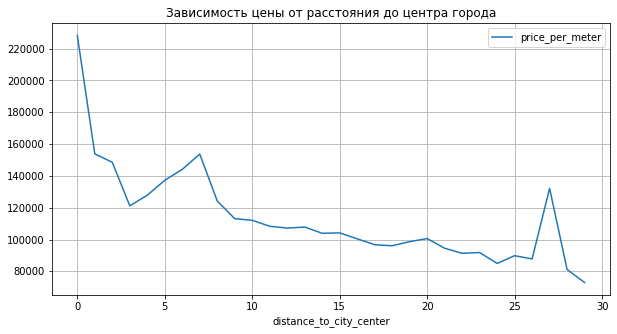

In [114]:
price_per_km.plot(grid=True, title = 'Зависимость цены от расстояния до центра города', figsize=(10, 5))
plt.show()

Видно, что чем дальше от центра Санкт-Петербурга, тем стоимость за квадратный метр уменьшается. Но на расстоянии 7 км и 27 км от центра происходит рост цен за квадратный метр. Такой прирост может быть из-за нахождения в этом месте хорошо обустроенных и дорогих районов.

### Общий вывод

Исходные данные — это данные сервиса Яндекс Недвижимость, где расположен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Стояла задача: определить от каких параметров зависит рыночная стоимость объектов недвижимости. Это необходимо, чтобы создать систему, которая сможет отслеживать аномалии и мошенническую деятельность.

Изучив общую информацию, мы увидели начальное количество данных, то, с чем нам предстояло работать. В них было большое количество пропущенных значений.

Предобработку данных мы начали с заполнения пропусков в столбце 'balcony', он один из тех, кто отличился большим количеством пропусков. Причина появления NaN в столбце с количеством балконов может быть такая, что в данном объекте недвижимости, который публиковал пользователь, нет балкона, либо человек мог забыть указать данное значение. Поэтому мы пришли к выводу, что здесь необходима замена NaN на число 0.

Расстояния до ближайшего водоёма и парка ('ponds_nearest' и 'parks_neares' соответственно) тоже содержали пропуски, причиной этого является то, что данные автоматически получены из геосервисов, следовательно, могла произойти ошибка при заполнении. Однако сложно найти логическую замену этих значений, поэтому было принято решение - оставить пропуски пустыми.

Ещё один столбец с большим количеством пропусков - 'is_apartment'. Данные в этом столбце заполняются так, что если объект является апартаментом, то ставится значение True, иначе False. Причиной появления NaN могло стать то, что многие объекты недвижимости не являются апартаментами, поэтому эти ячейки оставлены пустыми, поэтому мы заменили все пустоты на False, так как это логичный вариант.

Столбцы, в которых указаны названия населённых пунктов и количество всех этажей в доме ('locality_name' и 'floors_total' соответственно), являются самыми маленькими по количеству пропусков, они составляют малую часть от всего количества данных, поэтому мы удалили строки с пропущенными значениями. Человек мог не указать данные параметры, либо забыть это сделать, это может оправдывать существование NaN в этих столбцах.

'Parks_around3000' и 'ponds_around3000' - число парков в радиусе 3 км и число прудов в радиусе 3 км соответственно, в этих столбцах, мы также не можем найти замену, поэтому оставили ячейки пустыми.

NaN в столбцах 'ceiling_height', 'living_area' и 'kitchen_area' (высота потолков, жилая площадь и площадь кухни соответственно) могло появиться таким образом, если пользователь неправильно указал формат, либо решил не указывать какое-либо значение по незнанию, либо по причине того, что забыл, также кто-то мог посчитать это необязательным параметром. Пропуски для высоты потолков мы заполняли медианными значениями, которые отражают приблизительные значения для дынных сгруппированных по тому, в каком населённом пункте находится объект и в каком доме. Пропущенные значения для жилой площади и кухни мы посчитали по такой схеме: нашли отношение жилой площади (площади кухни) к общей площади квартиры, затем взяли средние значения по всем столбцам, далее потом заполнили NaN значениями, которые получили, умножив найденное отношение на общую площадь, которая нам известна.

По итогу предобработки данных у нас остались лишь несколько столбцов с пустыми значениями, к которым нам сложно подобрать логическую замену (days_exposition, parks_around3000, ponds_around3000, cityCenters_nearest, airports_nearest, ponds_nearest, parks_nearest).

Далее мы изменили типы данных, для удобства в дальнейшем анализе, в таких столбцах, как 'first_day_exposition', 'last_price', 'balcony', 'floors_total'.

Затем мы выявили уникальные значения в названиях населённых пунктов и заменили разные названия одних и тех же мест на одинаковые, тем самым исключили повторы.

Следующим действием было добавление необходимых столбцов, которые в дальнейшем нам бы пригодились для выявления различных зависимостей. Мы рассчитали цену одного квадратного метра и создали столбец 'price_per_meter', в который записали данные значения. Также появились новые столбцы с днём недели, месяцем, годом публикации объявления, типом этажа квартиры и расстоянием до центра города в километрах ('weekday', 'month', 'year', 'type_floor' и 'distance_to_city_center' соответственно).

В исследовательском анализе данных мы изучали различные параметры объектов и выявляли аномальные значения, искажённые данные мы приводили в порядок, если причина их была ясна, в другом случае мы исключали те значения, которые были редкими и выбивающимися. Для того, чтобы это понять мы строили отдельные гистограммы для каждого из параметров, также делали диаграммы размаха, затем методом среза убирали ненужное, либо пытались данные исправить.

После проведения среза данных у нас остались такие значения: квартиры с общей площадью больше 10 м² и меньше 400 м², с жилой площадью больше 5 м² и меньше 240 м², площадью кухни больше 5 м² и меньше 80 м², с ценой меньше 100 млн. рублей, с количеством комнат меньше 10, с высотой потолков больше 2 и меньше 8 метров.

После того, как мы изучили все параметры объектов недвижимости, пришли к такому умозаключению: чаще всего выставляют на продажу квартиры с общей площадью от 30 и до 50 м², с жилой площадью от 15 и до 20 м², с площадью кухни от 5 и до 12 м², стоимостью от 3 до 5 млн. рублей, с числом комнат от 1 до 3, с высотой потолков от 2 и до 4 метров, расположенные на любом этаже дома кроме первого и последнего, в пятиэтажных и девятиэтажных домах, удалённых от центра на расстояние 12-16 км.

Далее мы исследовали скорость продажи квартир. Как выяснилось, среднее время публикации объявления составляет 181 день, примерно 6 месяцев, а медианное 96 дней, это в два раза меньше. Так получилось, потому что есть необычно долгие продажи — это 1580 дней (4 года), из-за этого такая разница между средним и медианными показателями. Также есть продажи, которые можно назвать быстрыми, это 45, 60 дней. Такое малое время могло появиться из-за автоматического снятия объявления с сайта. Быстрее всего продавались квартиры в августе, так как может быть большой спрос на жильё из-за студентов, которые переехали в другой город на учёбу, а дольше всего объявления находились на сайте в январе.

Мы рассмотрели, как зависит цена от разных параметров объекта, построили графики, диаграммы, воспользовались матрицей корреляции, которая показывала коэффициент зависимости, после этого пришли к выводу, что больше всего на стоимость объекта влияет его общая площадь. Стоимость объекта от жилой и площади кухни мало зависит, как это показала диаграмма и коэффициент корреляции, сложно просмотреть явную зависмость. Зависимость цены от количества комнат в квартире наблюдается, но не яркая, коэффициент 0,59 указывает на среднюю связь. Также могут быть дорогие квартиры с малым числом комнат, но где комнаты большие. Квартиры, расположенные на первом и последних этажах продают дешевле, чем на любом другом. Заметили, что дороже всего продавались квартиры, опубликованные в четверг, а дешевле всего были в субботу и воскресенье. От месяца публикации стоимость зависела так, что в октябре квартиры продавались дешевле всего, а дороже всего, опубликованные в сентябре и декабре. Также было подмечено, что с 2014 года цены на квартиры снижались, а в 2018 году была самая низкая цена продаж. В 2019 году произошёл небольшой рост цен.

Посчитав среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, выяснили, что самая большая цена 1 м² в Санкт-Петербурге, а минимальная - в городе Выборг.
В итоге, мы увидели, что чем дальше от центра Санкт-Петербурга, тем стоимость за квадратный метр уменьшается. Но на расстоянии 7 км и 27 км от центра происходит рост цен за квадратный метр. Такой прирост может быть из-за нахождения в этом месте хорошо обустроенных и дорогих районов.